In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [267]:
# Dropping the columns that will not add any value to the model output. While these columns might be useful 

pd.set_option('display.max_columns', None)
df = pd.read_csv(r'C:\Users\Vipul\CreditLine-Decision-Engine-Using-Amazon-Sagemaker\credit.csv')


In [268]:
df.head(4)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"


In [280]:
dti_greater_than_40 = df[df['dti'] > 40]
dti_greater_than_40.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
885,10000.0,36 months,16.29,353.01,D,D1,NaN,NaN,RENT,25000.0,Verified,Mar-2016,Charged Off,debt_consolidation,Debt consolidation,43.69,Jul-1991,10.0,1.0,3709.0,14.7,21.0,w,DIRECT_PAY,0.0,1.0,"34046 Stephanie Throughway\r\nErikstad, MN 93700"
1291,10000.0,36 months,11.47,329.62,B,B5,Knot sawer,7 years,MORTGAGE,22000.0,Verified,Feb-2016,Fully Paid,debt_consolidation,NaN,40.81,Apr-2002,8.0,0.0,5906.0,53.7,33.0,w,JOINT,2.0,0.0,USNV Gray\r\nFPO AP 48052
3169,8750.0,36 months,17.27,313.14,D,D2,Sales analyst,8 years,OWN,69000.0,Verified,May-2016,Charged Off,debt_consolidation,Debt consolidation,42.54,Jun-2001,15.0,0.0,14849.0,31.9,27.0,w,DIRECT_PAY,1.0,0.0,"20149 Tanner Way Apt. 461\r\nEast Wendy, OK 30723"
4132,15000.0,36 months,21.97,572.63,E,E4,Clerk IV,2 years,RENT,30000.0,Verified,Mar-2016,Charged Off,credit_card,Credit card refinancing,43.24,Apr-2003,10.0,1.0,13523.0,68.6,33.0,f,DIRECT_PAY,1.0,1.0,Unit 8344 Box 3494\r\nDPO AA 70466
4413,24000.0,36 months,14.46,825.64,C,C4,Ed Tech III,< 1 year,RENT,27000.0,Verified,Feb-2016,Fully Paid,credit_card,NaN,51.20,Aug-2000,27.0,0.0,17382.0,83.6,62.0,w,JOINT,2.0,0.0,USCGC Olson\r\nFPO AA 30723


In [281]:
correlation = df[['dti', 'revol_bal']].corr()
print(correlation)


                dti  revol_bal
dti        1.000000   0.141503
revol_bal  0.141503   1.000000


In [ ]:
df.drop(['issue_d','purpose','title','earliest_cr_line','initial_list_status','revol_bal','installment','int_rate','application_type','total_acc','emp_title'],axis=1,inplace = True)

In [241]:
df.head(5)

,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,B,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,41.8,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,53.3,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,B,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,92.2,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,A,A2,6 years,RENT,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,21.5,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,C,C5,9 years,MORTGAGE,55000.0,Verified,Charged Off,33.95,13.0,0.0,69.8,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [242]:
df['pincode'] = df['address'].str.extract(r'(\d{5})$')
df.drop('address',axis=1,inplace=True)

In [243]:
df.head(1)

,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,B,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,41.8,0.0,0.0,22690


In [265]:
df['loan_amnt'].max()

40000.0

In [269]:
df['dti'].max()

9999.0

There is some problem with the dti column. It cannot be greater than 100. I mean it can be but anything above 100 does not matter.

In [244]:
df.value_counts('home_ownership')

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [245]:
df.value_counts('emp_length')

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [246]:
df.value_counts('pincode')

pincode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [263]:
df.value_counts('open_acc')

open_acc
9.0     36717
10.0    35390
8.0     35067
11.0    32639
7.0     31275
        ...  
56.0        2
76.0        2
57.0        1
58.0        1
90.0        1
Name: count, Length: 61, dtype: int64

In [247]:
df.value_counts('pub_rec')

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
12.0         4
13.0         4
19.0         2
15.0         1
17.0         1
24.0         1
40.0         1
86.0         1
Name: count, dtype: int64

In [248]:

df.value_counts('mort_acc')

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
26.0         2
31.0         2
32.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [249]:
df.value_counts('pub_rec_bankruptcies')


pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

Dropping this 'total_acc' column as well as it is not adding any additional value to the model. There are some discrepancies as well. Someone with less than 1 year of experience is having 26 accounts, which is not possible.

Even if someone has completed 1 loan from Loan Tap successfully, he should be eligible for another loan.

In [250]:
df.shape 

(396030, 16)

In [251]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   grade                 396030 non-null  object 
 3   sub_grade             396030 non-null  object 
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_util            395754 non-null  float64
 13  mort_acc              358235 non-null  float64
 14  pub_rec_bankruptcies  395495 non-null  float64
 15  

In [252]:
df.isnull().sum()

loan_amnt                   0
term                        0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
pincode                     0
dtype: int64

In [253]:
categorical_column = []
nemrical_column = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical_column.append(i)
    else:
        nemrical_column.append(i)

In [254]:
# Number of unique values in all non-numeric columns
for col in categorical_column:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_length: 11
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in loan_status: 2
No. of unique values in pincode: 10


## Data Engineering

In [255]:
df.head(3)

,loan_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,36 months,B,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,41.8,0.0,0.0,22690
1,8000.0,36 months,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,53.3,3.0,0.0,05113
2,15600.0,36 months,B,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,92.2,0.0,0.0,05113


### Data Engineering on Categorical columns

In [256]:
#converting months into years.
df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.strip().map({'36 months': 3, '60 months': 5}).astype(int)



In [257]:
#dropping emp_length column as it doesnt make any sense. Now all the employees are eligible. No one is having less than 1 year of experience.
df.drop('emp_length', axis=1, inplace=True)

# DROPPING values that contain home_ownership as OTHER', 'NONE', 'ANY. We cannot risk giving loan to someone we dont know where they are living.
df = df[~df['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])]

In [258]:
df.head(3)

,loan_amnt,term,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,3,B,B4,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,41.8,0.0,0.0,22690
1,8000.0,3,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,53.3,3.0,0.0,05113
2,15600.0,3,B,B3,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,92.2,0.0,0.0,05113


### Working on missing values

In [259]:
missing_values = df.isna().sum()
print(missing_values)

loan_amnt                   0
term                        0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_util                274
mort_acc                37715
pub_rec_bankruptcies      533
pincode                     0
dtype: int64


In [260]:
# Fill 'revol_util' column with average. Since we can assume that they are having average used revolving credit. It is conservative.
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

# Fill 'mort_acc' column with 0.0. 
# Ones with having no value for mortgage, we will consider as 0. We will try to be as conservative as possible.
df['mort_acc'].fillna(0.0, inplace=True)

# Drop rows with missing values in 'pub_rec_bankruptcies' column.
# we cannot take any chances since we dont have data for bankruptcies. we will simply drop these rows.
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [261]:
df.isna().sum().sum()

0

We have worked on all the missing values.

### Working on numerical columns

In [262]:
df.head(3)

,loan_amnt,term,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_util,mort_acc,pub_rec_bankruptcies,pincode
0,10000.0,3,B,B4,RENT,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,41.8,0.0,0.0,22690
1,8000.0,3,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,53.3,3.0,0.0,05113
2,15600.0,3,B,B3,RENT,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,92.2,0.0,0.0,05113


In [238]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 'less_than_3' if x < 3.0 else '3_or_more')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 'no' if x == 0.0 else 'yes')
df['mort_acc'] = df['mort_acc'].apply(lambda x: 'yes' if x < 0.0 else 'no')



In [277]:
df['dti'] = df['dti'].apply(lambda x: x if x < 60 else 60)

In [278]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


### Data Visualization

Lets see what relation pincode is having with Loan_status

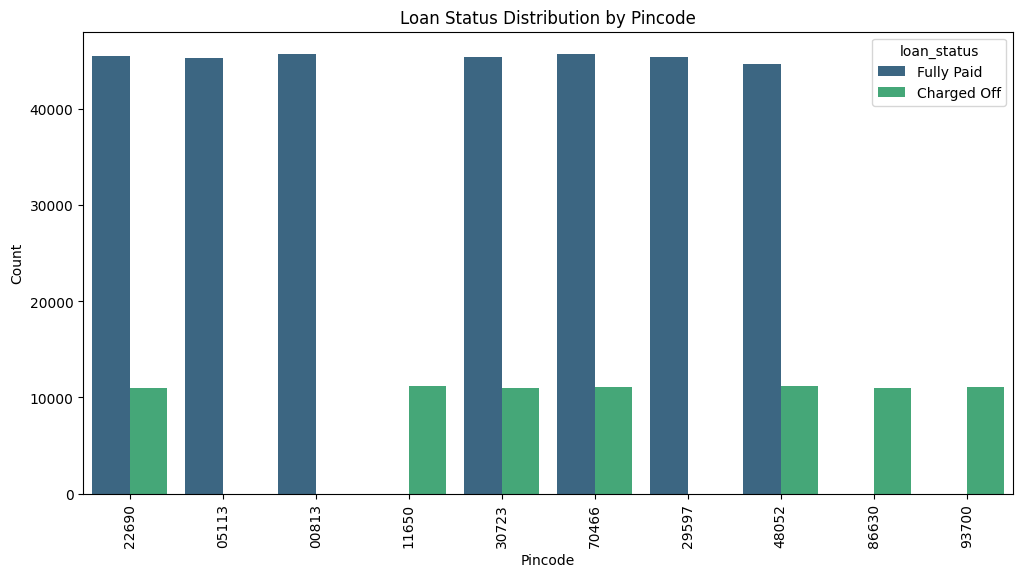

In [208]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pincode', hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by Pincode')
plt.xlabel('Pincode')
plt.ylabel('Count')
plt.show()

Interesting, All the loan from the Pin code 93700,11650,86630 have been defaulter. If we want to fund people from these areas we will have to be very cautious. We will only offer pre-approved loans to the people who have been a top profile.

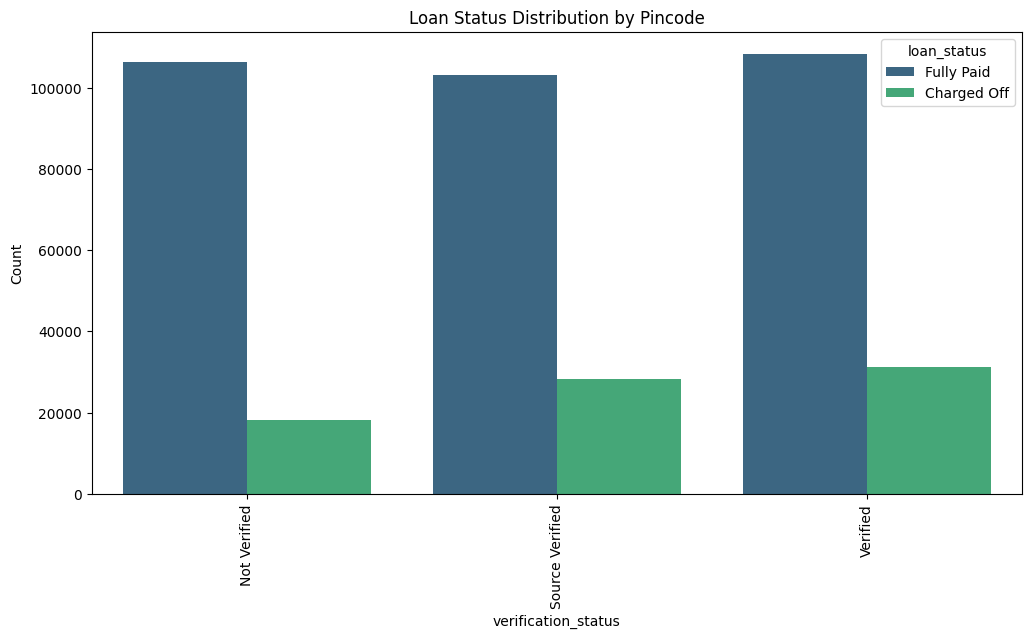

In [210]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='verification_status' ,hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by Pincode')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.show()

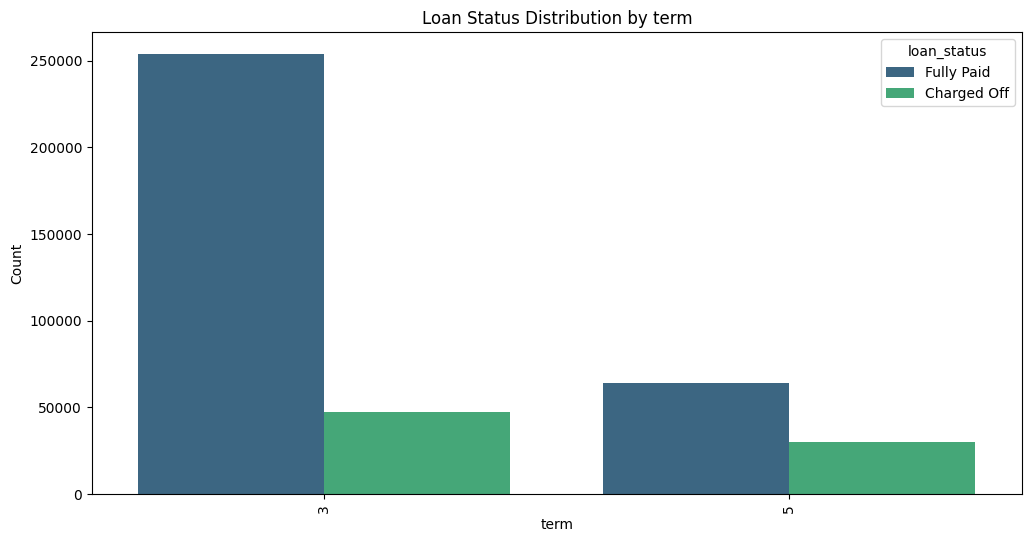

In [211]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='term', hue='loan_status', palette='viridis')
plt.xticks(rotation=90)
plt.title('Loan Status Distribution by term')
plt.xlabel('term')
plt.ylabel('Count')
plt.show()

We have a nice observation here, 20% of the total loan that were borrowed for 3 years defaulted on their payments.
Where as almost 50% of the total loan that were borrowed for 5 years defaulted on their payments.

We can conclude that the term of the loan has a significant impact on the loan status.
We will be only offering 3 years as max tenure. 5 years will only be offered if the profile is top 10% of all the clients.
Someone has to tick every box to be able to borrow the loan for 5 years.

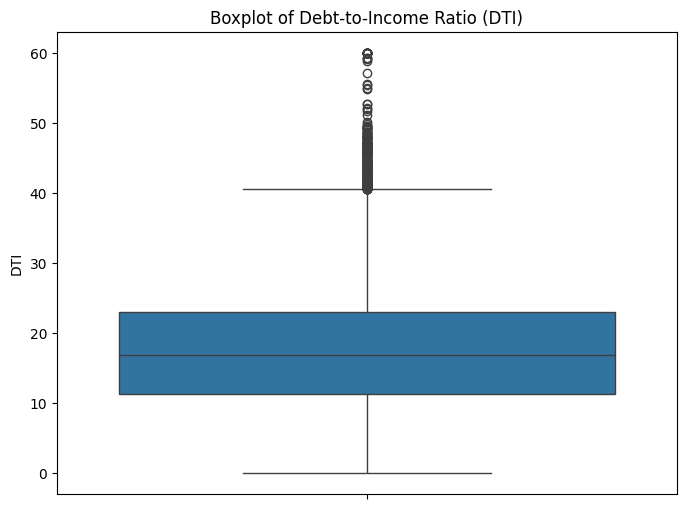

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='dti')
plt.title('Boxplot of Debt-to-Income Ratio (DTI)')
plt.ylabel('DTI')
plt.show()

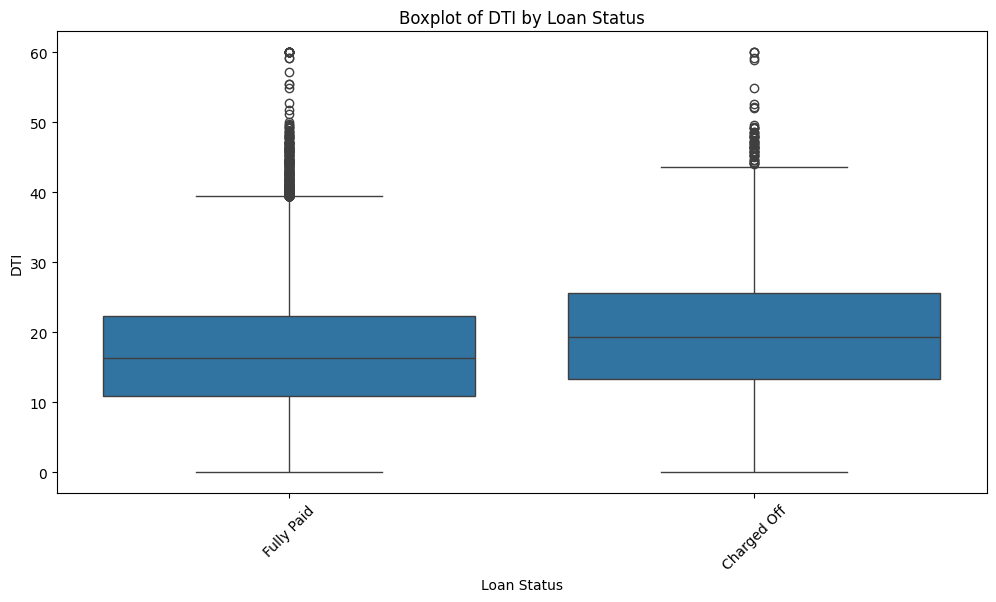

In [282]:
# Plotting a boxplot of 'dti' by 'loan_status'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('Boxplot of DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.xticks(rotation=45)
plt.show()
